In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from modelval import pairptl, network, trainer, dataset
from modelval.ArbDataGen import arb_w_gen

% matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


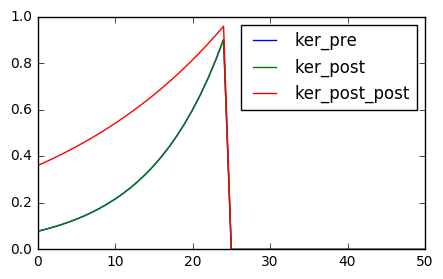

In [31]:
# Visualize kernel
from modelval.kernel import KernelGen
plt.figure(figsize=(5,3))
ker_pre_post = KernelGen().uni_exp_ker(side='left', tau=20)
ker_post_pre = KernelGen().uni_exp_ker(side='left', tau=20)
ker_post_post = KernelGen().uni_exp_ker(side='left', tau=50)
ker_test = KernelGen(kernel_pre_post=ker_pre_post, kernel_post_pre=ker_post_pre, kernel_post_post=ker_post_post)
plt.plot(ker_pre_post, label='ker_pre')
plt.plot(ker_post_pre, label='ker_post')
plt.plot(ker_post_post, label='ker_post_post')
plt.legend()

In [32]:
# Load data frame
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')
data['train_len'] = data['ptl_occ'] / data['ptl_freq']
data.head()

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste,train_len
0,1,1,0,1,0,60,1.0,-102.898046,0.0,0,-1.322590,0.0,60.0
1,1,1,0,1,0,60,1.0,-75.579896,0.0,0,2.674768,0.0,60.0
2,1,1,0,1,0,60,1.0,-80.871473,0.0,0,-12.696449,0.0,60.0
3,1,1,0,1,0,60,1.0,-67.562239,0.0,0,0.231446,0.0,60.0
4,1,1,0,1,0,60,1.0,-63.553410,0.0,0,-0.990216,0.0,60.0


In [ ]:
# Generate data
ptl_list = [1]
spk_len = int(data[data['ptl_idx'].isin(ptl_list)]['train_len'].max() * 1000 / ker_test.reso_kernel)
spk_pairs, targets = arb_w_gen(df=data, ptl_list=ptl_list, spk_len=spk_len, kernel=ker_test, aug_times=10, net_type='triplet')

In [24]:
network.TripNet(kernel_pre_post=ker_test.kernel_pre_post, kernel_post_pre=ker_test.kernel_post_pre, kernel_post_post=ker_test.kernel_post_post)